In [3]:
import pandas as pd
from prophet import Prophet

In [5]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [6]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### preparing a dataframe to make predictions on.  
this df will include all the dates in the dataframe plus 365 more days

In [7]:
future = m.make_future_dataframe(365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [8]:
future.shape

(3270, 1)

### forecast

In [11]:
forecast = m.predict(future)
forecast.tail()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
3265 2017-01-15  7.186554    7.494783    8.976084     6.864806     7.498639   
3266 2017-01-16  7.185524    7.824292    9.243633     6.863132     7.498594   
3267 2017-01-17  7.184494    7.555380    8.998920     6.861562     7.498813   
3268 2017-01-18  7.183464    7.428029    8.835037     6.859007     7.499022   
3269 2017-01-19  7.182434    7.460253    8.899263     6.856220     7.498966   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
3265        1.018063              1.018063              1.018063  0.048279   
3266        1.344104              1.344104              1.344104  0.352293   
3267        1.132527              1.132527              1.132527  0.119631   
3268        0.966170              0.966170              0.966170 -0.066664   
3269        0.979127              0.979127              0.979127 -0.072254   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
3265      0.048279      0.048279  0.969784      0.969784      0.969784   
3266      0.352293      0.352293  0.991812      0.991812      0.991812   
3267      0.119631      0.119631  1.012896      1.012896      1.012896   
3268     -0.066664     -0.066664  1.032834      1.032834      1.032834   
3269     -0.072254     -0.072254  1.051381      1.051381      1.051381   

      multiplicative_terms  multiplicative_terms_lower  \
3265                   0.0                         0.0   
3266                   0.0                         0.0   
3267                   0.0                         0.0   
3268                   0.0                         0.0   
3269                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
3265                         0.0  8.204617  
3266                         0.0  8.529628  
3267                         0.0  8.317021  
3268                         0.0  8.149634  
3269                         0.0  8.161561

In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.204617    7.494783    8.976084
3266 2017-01-16  8.529628    7.824292    9.243633
3267 2017-01-17  8.317021    7.555380    8.998920
3268 2017-01-18  8.149634    7.428029    8.835037
3269 2017-01-19  8.161561    7.460253    8.899263

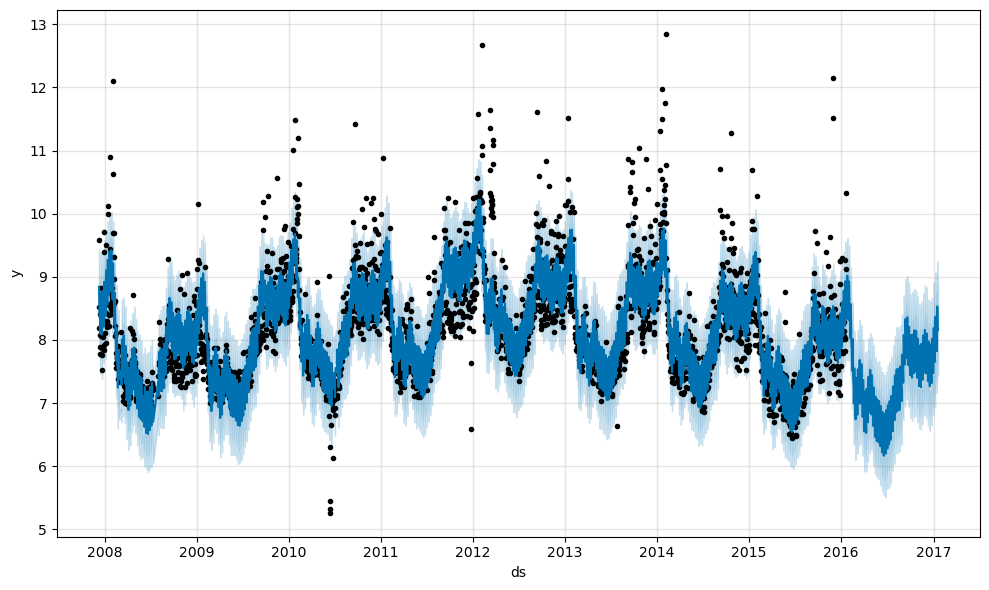

In [15]:
m.plot(forecast)

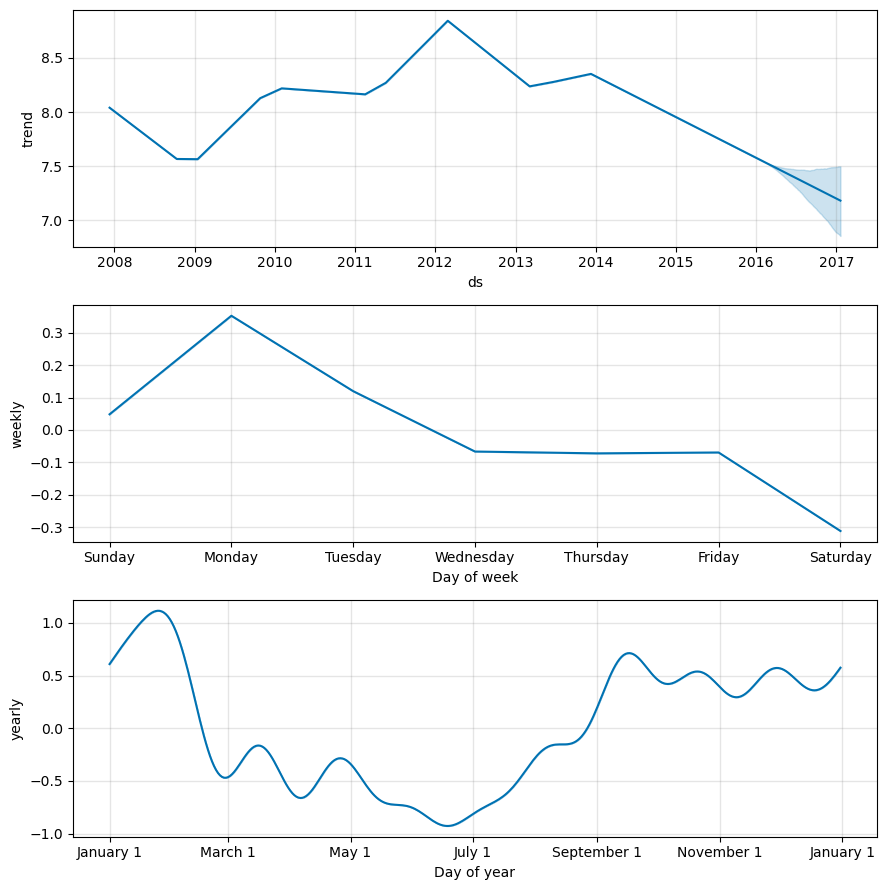

In [16]:
m.plot_components(forecast)

If plotly worked in jupyter lab this would work.   
If this is working then you are probably not viewing this in jupyyter lab

In [17]:
from prophet.plot import plot_plotly, plot_components_plotly

In [18]:
plot_plotly(m, forecast)

In [19]:
plot_components_plotly(m, forecast)